In [24]:
import pandas as pd
import janitor
import datetime
import numpy as np

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx


C:\Users\matt\AppData\Local\Temp\ipykernel_2912\104230228.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [13]:
df_orig = pd.read_csv("Connections.csv",skiprows=2)
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     515 non-null    object
 1   Last Name      515 non-null    object
 2   URL            515 non-null    object
 3   Email Address  2 non-null      object
 4   Company        486 non-null    object
 5   Position       486 non-null    object
 6   Connected On   518 non-null    object
dtypes: object(7)
memory usage: 28.5+ KB


In [16]:
df_comp = (df_orig
           .clean_names()
           .drop(columns = ['first_name','last_name','email_address','url'])
           .dropna(subset=['company', 'position'])
           .to_datetime('connected_on', format='%d %b %Y')
)
df_comp.head()


c:\Users\matt\.conda\envs\DataVis\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.transform_columns` instead.
  return method(self._obj, *args, **kwargs)


,company,position,connected_on
0,Jordan-Elbridge Central School District,Building Substitute Teacher,2025-02-24
1,SUNY Polytechnic Institute,Garduate Assistant,2025-02-23
2,"Ryder System, Inc.",Rental Management Trainee,2025-02-22
4,MJMR Consulting,Founder,2025-02-22
5,"Prime Medicine, Inc.",IT Infrastructure Co-op,2025-02-22


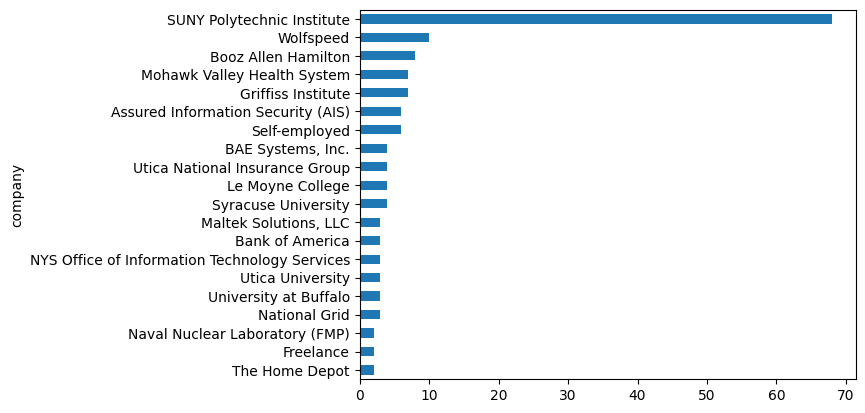

In [21]:
df_comp['company'].value_counts().head(20).plot(kind="barh").invert_yaxis();

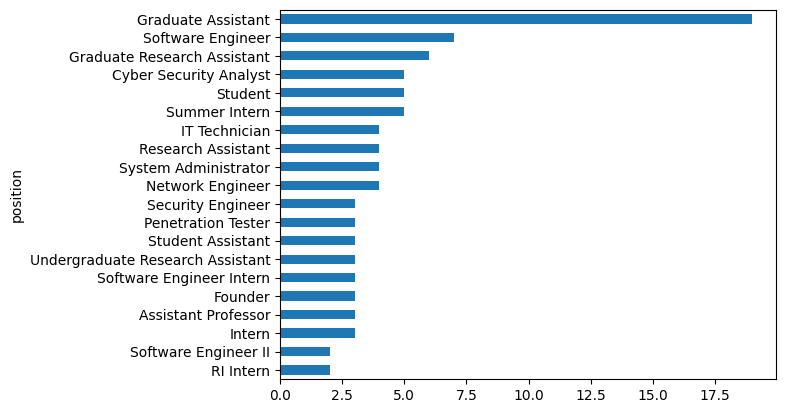

In [26]:
df_comp['position'].value_counts().head(20).plot(kind="barh").invert_yaxis();

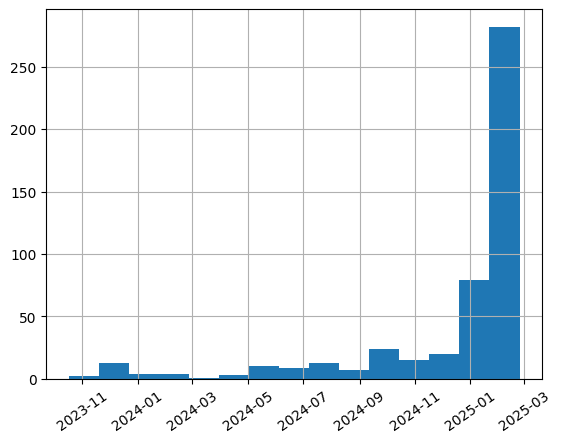

In [27]:
df_comp['connected_on'].hist(xrot=35, bins=15);

In [29]:
pattern = "freelance|self-employed"
df_comp_selc = df_comp[~df_comp['company'].str.contains(pattern, case=False)]

df_company = df_comp_selc['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(20)


,company,count
0,SUNY Polytechnic Institute,68
1,Wolfspeed,10
2,Booz Allen Hamilton,8
3,Mohawk Valley Health System,7
4,Griffiss Institute,7
5,Assured Information Security (AIS),6
6,Utica National Insurance Group,4
7,"BAE Systems, Inc.",4
8,Le Moyne College,4
9,Syracuse University,4


In [31]:
df_position = df_comp_selc['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(20)

,position,count
0,Graduate Assistant,19
1,Software Engineer,7
2,Graduate Research Assistant,6
5,Cyber Security Analyst,5
4,Summer Intern,5
3,Student,5
9,Network Engineer,4
8,System Administrator,4
7,Research Assistant,4
6,IT Technician,4


In [38]:
df_vis = df_comp_selc.groupby(['company', 'position']).size().reset_index(name='count')
df_vis = df_vis.sort_values(by="count", ascending=False)
df_vis

,company,position,count
303,SUNY Polytechnic Institute,Graduate Assistant,19
304,SUNY Polytechnic Institute,Graduate Research Assistant,6
39,Black River Systems Company,Software Engineer,2
48,Bowers CPAs & Advisors,Audit Staff Accountant,2
43,Booz Allen Hamilton,Cybersecurity Test Engineer,2
...,...,...,...
23,Atlas Copco,Commissioning Engineer,1
24,Auburn Community Hospital,IT Cybersecurity Intern,1
25,Auburn Community Hospital,Nursing Manager,1
26,BAE Systems,Software Engineer II,1


In [39]:
df_vis = df_comp_selc.groupby(['company', 'position']).size().reset_index(name='count')
df_vis = df_vis.sort_values(by="count", ascending=False)
df_vis.head(20)

# First visualization
nt = net.Network(notebook=True, height='700px', width='700px')

g = nx.Graph()
g.add_node(0, label = "root") 
g.add_node(1, label = "Company 1", size=10, title="info1")
g.add_node(2, label = "Company 2", size=40, title="info2")
g.add_node(3, label = "Company 3", size=60, title="info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)

nt.from_nx(g)
nt.show('nodes.html')


print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")

g = nx.Graph()
g.add_node('root') 

for _, row in df_company.iterrows():

  
  company = row['company']
  count = row['count']

  title = f"{company} – {count}"
  positions = set([x for x in df_vis[company == df_vis['company']]['position']])
  positions = ''.join('{}'.format(x) for x in positions)

  position_list = f"{positions}"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#3449eb')
  g.add_edge('root', company, color='grey')

# generate the graph
nt = net.Network(notebook=True, height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()
# more customization https://tinyurl.com/yf5lvvdm
nt.show('company_graph.html')

nodes.html
number of nodes: 4
number of edges: 3
company_graph.html
